
# 📈 Superstore Monthly Profit Forecasting using Machine Learning

This notebook focuses exclusively on time series prediction of monthly profit using lag features.

### ✅ Key Steps:
- Monthly aggregation from transactional data
- Log transform to stabilize variance
- Lag features (Profit_t-1, Profit_t-2, Profit_t-3)
- Final tuned models:
  - Random Forest (GridSearchCV)
  - XGBoost (L1 + L2)
  - MLP (tuned hidden layers + early stopping)
- Evaluation metrics: RMSE, MAE, R², MAPE (%)
- Visual comparison of predictions (train & test)


In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load and prepare data
df = pd.read_excel("Sample - Superstore.xls")
df.columns = df.columns.str.strip()
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Monthly profit aggregation
monthly_df = df.resample('MS', on='Order Date')['Profit'].sum().reset_index()
monthly_df['Profit'] = monthly_df['Profit'].clip(lower=0)
monthly_df['Log_Profit'] = np.log1p(monthly_df['Profit'])

# Lag features
for lag in range(1, 4):
    monthly_df[f'Lag_{lag}'] = monthly_df['Log_Profit'].shift(lag)
monthly_df.dropna(inplace=True)

# Features and target
X = monthly_df[['Lag_1', 'Lag_2', 'Lag_3']]
y = monthly_df['Log_Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:

def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name}")
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAPE: {:.2f}%\n".format(mean_absolute_percentage_error(y_true, y_pred) * 100))


In [5]:

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid={'n_estimators': [100, 200],
                                   'max_depth': [3, 5, None]},
                       cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
rf_train_preds = rf_grid.predict(X_train_scaled)
rf_test_preds = rf_grid.predict(X_test_scaled)

evaluate_model("Random Forest (Train)", y_train, rf_train_preds)
evaluate_model("Random Forest (Test)", y_test, rf_test_preds)


📊 Random Forest (Train)
RMSE: 0.8296201661033274
MAE: 0.4656769981113149
R² Score: 0.8360347797352089
MAPE: 74300456650518176.00%

📊 Random Forest (Test)
RMSE: 1.4512083469325179
MAE: 1.2026719617499013
R² Score: -3.156534094805747
MAPE: 13.72%



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:

xgb = XGBRegressor(objective='reg:squarederror',
                   reg_alpha=1.0,
                   reg_lambda=1.0,
                   learning_rate=0.1,
                   n_estimators=100,
                   random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_train_preds = xgb.predict(X_train_scaled)
xgb_test_preds = xgb.predict(X_test_scaled)

evaluate_model("XGBoost (Train)", y_train, xgb_train_preds)
evaluate_model("XGBoost (Test)", y_test, xgb_test_preds)


📊 XGBoost (Train)
RMSE: 0.3082658847994444
MAE: 0.2193292737765691
R² Score: 0.977361686694621
MAPE: 15614354350262044.00%

📊 XGBoost (Test)
RMSE: 0.8454205042072314
MAE: 0.6415646214648966
R² Score: -0.4106438028225148
MAPE: 7.94%



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   alpha=0.001,
                   learning_rate_init=0.001,
                   max_iter=2000,
                   early_stopping=True,
                   random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_train_preds = mlp.predict(X_train_scaled)
mlp_test_preds = mlp.predict(X_test_scaled)

evaluate_model("MLP (Train)", y_train, mlp_train_preds)
evaluate_model("MLP (Test)", y_test, mlp_test_preds)


📊 MLP (Train)
RMSE: 1.9007229768509373
MAE: 1.0316668565516958
R² Score: 0.1393416514912722
MAPE: 182382635857416672.00%

📊 MLP (Test)
RMSE: 1.2235154418554337
MAE: 1.0825812123401426
R² Score: -1.9545457668842907
MAPE: 12.49%



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


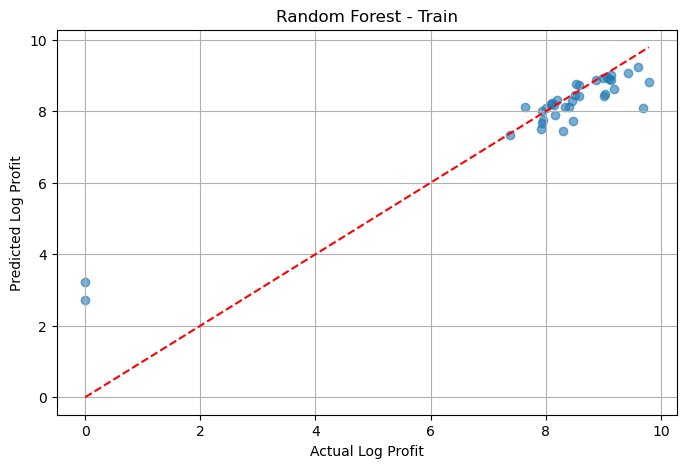

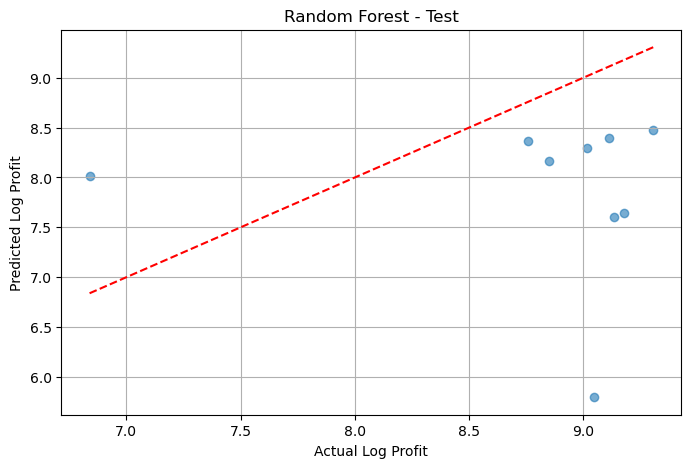

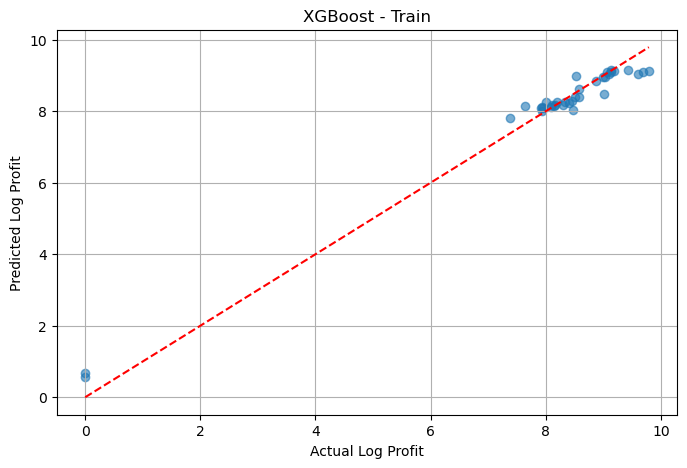

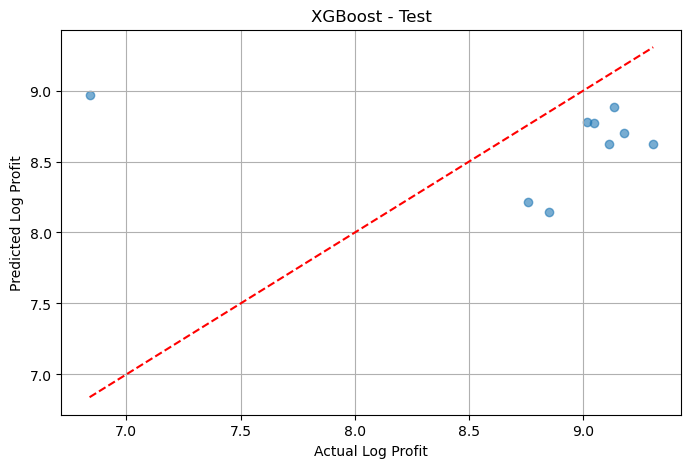

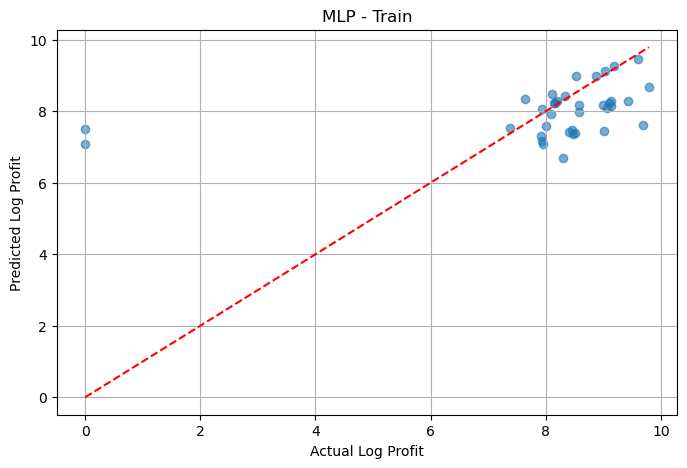

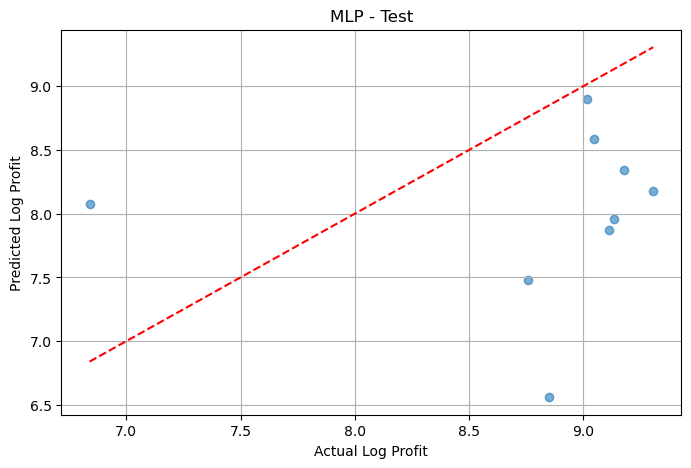

In [8]:

def plot_preds(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Log Profit")
    plt.ylabel("Predicted Log Profit")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot all models
plot_preds(y_train, rf_train_preds, "Random Forest - Train")
plot_preds(y_test, rf_test_preds, "Random Forest - Test")

plot_preds(y_train, xgb_train_preds, "XGBoost - Train")
plot_preds(y_test, xgb_test_preds, "XGBoost - Test")

plot_preds(y_train, mlp_train_preds, "MLP - Train")
plot_preds(y_test, mlp_test_preds, "MLP - Test")


C:\Users\Admin\AppData\Local\Temp\ipykernel_23044\1997593579.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='Order Date')['Profit'].sum().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_23044\1997593579.py:76: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


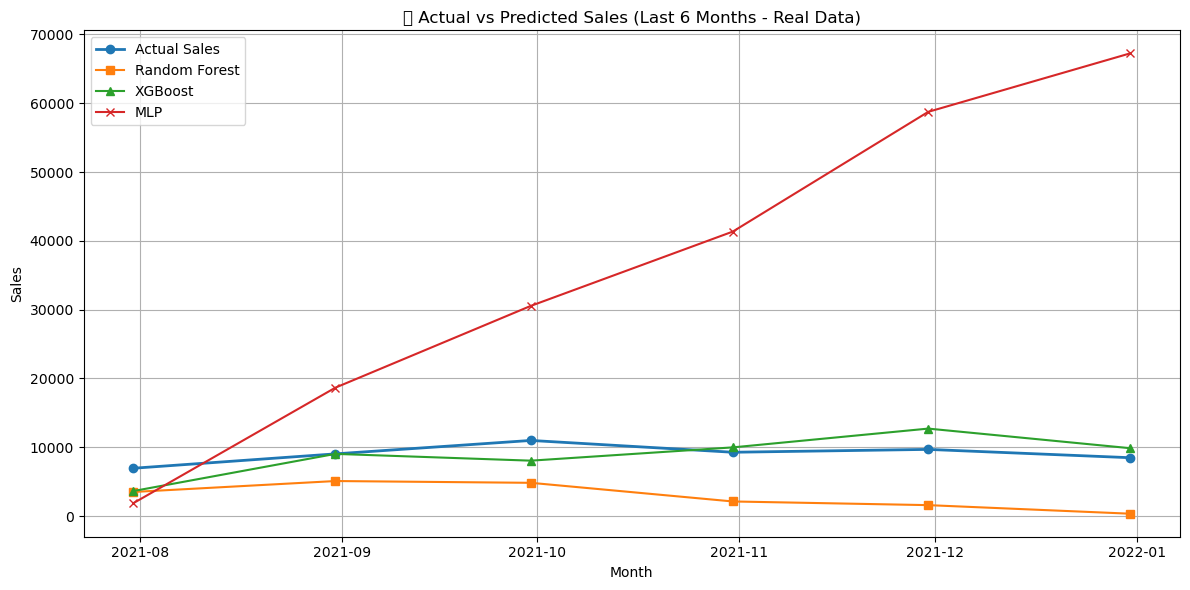

In [14]:

# 📊 Actual vs Predicted Sales (Real Data)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Load data
df = pd.read_excel("Sample - Superstore.xls", engine="xlrd")
df.columns = df.columns.str.strip()
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Monthly aggregation
monthly_df = df.resample('M', on='Order Date')['Profit'].sum().reset_index()
monthly_df['Profit'] = monthly_df['Profit'].clip(lower=0)
monthly_df['Log_Profit'] = np.log1p(monthly_df['Profit'])

# Create lag features
for lag in range(1, 4):
    monthly_df[f'Lag_{lag}'] = monthly_df['Log_Profit'].shift(lag)
monthly_df.dropna(inplace=True)

# Features & labels
X = monthly_df[['Lag_1', 'Lag_2', 'Lag_3']]
y = monthly_df['Log_Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train)
test_rf = rf.predict(X_test_scaled)

xgb = XGBRegressor(objective='reg:squarederror', alpha=0.1, reg_lambda=0.5, random_state=42)
xgb.fit(X_train_scaled, y_train)
test_xgb = xgb.predict(X_test_scaled)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate_init=0.01, alpha=0.001,
                   max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(X_train_scaled, y_train)
test_mlp = mlp.predict(X_test_scaled)

# Get the last n test points
n = min(6, len(y_test))
test_start_idx = len(monthly_df) - len(y_test)
dates_for_plot = monthly_df['Order Date'].iloc[test_start_idx:][ -n: ].values

# Real comparison dataframe
comparison_df = pd.DataFrame({
    "Date": dates_for_plot,
    "Actual": np.expm1(y_test[-n:].values),
    "Random Forest": np.expm1(test_rf[-n:]),
    "XGBoost": np.expm1(test_xgb[-n:]),
    "MLP": np.expm1(test_mlp[-n:])
})

# Plot real data
plt.figure(figsize=(12, 6))
plt.plot(comparison_df["Date"], comparison_df["Actual"], label="Actual Sales", marker='o', linewidth=2)
plt.plot(comparison_df["Date"], comparison_df["Random Forest"], label="Random Forest", marker='s')
plt.plot(comparison_df["Date"], comparison_df["XGBoost"], label="XGBoost", marker='^')
plt.plot(comparison_df["Date"], comparison_df["MLP"], label="MLP", marker='x')

plt.title("📊 Actual vs Predicted Sales (Last 6 Months - Real Data)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

